In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('fivethirtyeight')
import pathlib
import os
import seaborn as sns
import pandas as pd
from datetime import datetime

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import joblib
sns.set()

In [3]:
data = pd.read_csv('C:/Users/student/Downloads/edit_plant1_train.csv')

In [4]:
data.head()

,Unnamed: 0,plant1_train.mea_ddhr,plant1_train.tem_in_loc1,plant1_train.hum_in_loc1,plant1_train.tem_coil_loc1,plant1_train.tem_in_loc2,plant1_train.hum_in_loc2,plant1_train.tem_coil_loc2,plant1_train.tem_in_loc3,plant1_train.hum_in_loc3,plant1_train.tem_coil_loc3,plant1_train.tem_out_loc1,plant1_train.hum_out_loc1,plant1_train.cond_loc1,plant1_train.cond_loc2,plant1_train.cond_loc3
0,1,2016-04-01 0:00,16.0,24.0,11.0,14.0,23.0,11.0,13.0,32.0,10.0,9.0,42.0,0.0,0.0,0.0
1,2,2016-04-01 3:00,14.0,28.0,10.0,12.0,32.0,9.0,11.0,42.0,7.0,7.0,59.0,0.0,0.0,0.0
2,3,2016-04-01 6:00,13.0,33.0,10.0,11.0,37.0,9.0,10.0,44.0,7.0,6.0,56.0,0.0,0.0,0.0
3,4,2016-04-01 9:00,13.0,33.0,10.0,11.0,35.0,9.0,10.0,41.0,8.0,18.0,30.0,0.0,0.0,0.0
4,5,2016-04-01 12:00,16.0,28.0,10.0,15.0,27.0,11.0,14.0,30.0,9.0,18.0,20.0,0.0,0.0,0.0


In [5]:
data.drop(['Unnamed: 0'],axis=1, inplace=True)

In [6]:
data.drop(['plant1_train.cond_loc1','plant1_train.cond_loc2','plant1_train.cond_loc3'],axis=1, inplace=True)

In [7]:
def overViewOfTheData(data,frows=5,lrows=5):
  print("Shape: ",data.shape,"\n\n")
  
  print("Columns: ",data.columns,"\n\n")

  print("Info : ")
  print(data.info())

In [8]:
overViewOfTheData(data)

Shape:  (60686, 12) 


Columns:  Index(['plant1_train.mea_ddhr', 'plant1_train.tem_in_loc1',
       'plant1_train.hum_in_loc1', 'plant1_train.tem_coil_loc1',
       'plant1_train.tem_in_loc2', 'plant1_train.hum_in_loc2',
       'plant1_train.tem_coil_loc2', 'plant1_train.tem_in_loc3',
       'plant1_train.hum_in_loc3', 'plant1_train.tem_coil_loc3',
       'plant1_train.tem_out_loc1', 'plant1_train.hum_out_loc1'],
      dtype='object') 


Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60686 entries, 0 to 60685
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   plant1_train.mea_ddhr       60686 non-null  object 
 1   plant1_train.tem_in_loc1    59425 non-null  float64
 2   plant1_train.hum_in_loc1    59425 non-null  float64
 3   plant1_train.tem_coil_loc1  59425 non-null  float64
 4   plant1_train.tem_in_loc2    59668 non-null  float64
 5   plant1_train.hum_in_loc2    59668 non

Text(0, 0.5, 'Features')

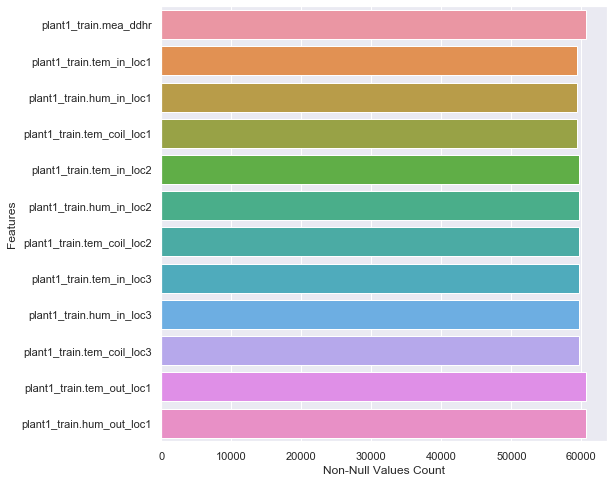

In [9]:
plt.figure(figsize=(8,8))
sns.barplot(x=data.count()[:],y=data.count().index)
plt.xlabel('Non-Null Values Count')
plt.ylabel('Features')

In [10]:
#data = data.drop([' _heatindexm',' _precipm',' _wgustm',' _windchillm'],axis=1)

In [11]:
data['plant1_train.mea_ddhr'] = pd.to_datetime(data['plant1_train.mea_ddhr'])

In [12]:
data.set_index('plant1_train.mea_ddhr', inplace=True)

In [13]:
data.dtypes, data.index.dtype

(plant1_train.tem_in_loc1      float64
 plant1_train.hum_in_loc1      float64
 plant1_train.tem_coil_loc1    float64
 plant1_train.tem_in_loc2      float64
 plant1_train.hum_in_loc2      float64
 plant1_train.tem_coil_loc2    float64
 plant1_train.tem_in_loc3      float64
 plant1_train.hum_in_loc3      float64
 plant1_train.tem_coil_loc3    float64
 plant1_train.tem_out_loc1     float64
 plant1_train.hum_out_loc1     float64
 dtype: object,
 dtype('<M8[ns]'))

In [14]:
data.index

DatetimeIndex(['2016-04-01 00:00:00', '2016-04-01 03:00:00',
               '2016-04-01 06:00:00', '2016-04-01 09:00:00',
               '2016-04-01 12:00:00', '2016-04-01 15:00:00',
               '2016-04-01 18:00:00', '2016-04-01 21:00:00',
               '2016-04-02 00:00:00', '2016-04-02 03:00:00',
               ...
               '2020-04-02 15:00:00', '2020-04-02 16:00:00',
               '2020-04-02 17:00:00', '2020-04-02 18:00:00',
               '2020-04-02 19:00:00', '2020-04-02 20:00:00',
               '2020-04-02 21:00:00', '2020-04-02 22:00:00',
               '2020-04-02 23:00:00', '2020-04-03 00:00:00'],
              dtype='datetime64[ns]', name='plant1_train.mea_ddhr', length=60686, freq=None)

In [15]:
# lets check dtype of all columns, 
data.dtypes, data.index.dtype

(plant1_train.tem_in_loc1      float64
 plant1_train.hum_in_loc1      float64
 plant1_train.tem_coil_loc1    float64
 plant1_train.tem_in_loc2      float64
 plant1_train.hum_in_loc2      float64
 plant1_train.tem_coil_loc2    float64
 plant1_train.tem_in_loc3      float64
 plant1_train.hum_in_loc3      float64
 plant1_train.tem_coil_loc3    float64
 plant1_train.tem_out_loc1     float64
 plant1_train.hum_out_loc1     float64
 dtype: object,
 dtype('<M8[ns]'))

In [16]:
#data = data.set_index('plant1_train.mea_ddhr',drop=True)
#data.index.name = 'plant1_train.mea_ddhr'

In [17]:
data.drop(['plant1_train.tem_in_loc1','plant1_train.hum_in_loc1','plant1_train.tem_coil_loc1','plant1_train.tem_in_loc2','plant1_train.hum_in_loc2','plant1_train.tem_coil_loc2','plant1_train.hum_in_loc3','plant1_train.tem_coil_loc3','plant1_train.tem_out_loc1','plant1_train.hum_out_loc1'], axis=1, inplace=True)
#data.drop(['plant1_train.tem_in_loc1','plant1_train.hum_in_loc1','plant1_train.tem_coil_loc1','plant1_train.tem_in_loc2','plant1_train.hum_in_loc2','plant1_train.tem_coil_loc2','plant1_train.tem_in_loc3','plant1_train.hum_in_loc3','plant1_train.tem_coil_loc3','plant1_train.tem_out_loc1','plant1_train.hum_out_loc1'], axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60686 entries, 2016-04-01 00:00:00 to 2020-04-03 00:00:00
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   plant1_train.tem_in_loc3  59655 non-null  float64
dtypes: float64(1)
memory usage: 948.2 KB


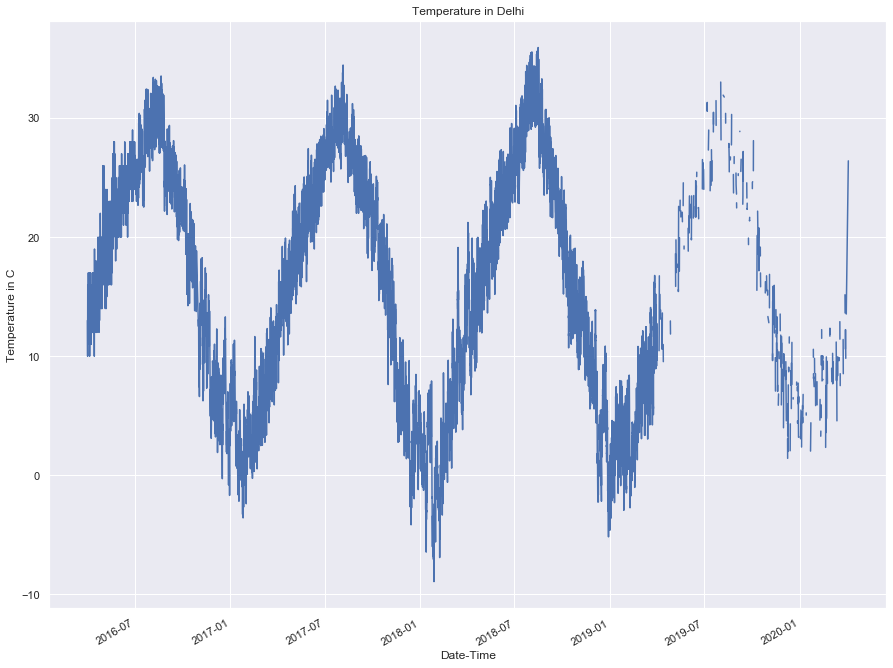

In [19]:
fig, ax = plt.subplots()
data['plant1_train.tem_in_loc3'].plot(figsize=(15,12),ax=ax)
ax.set_xlabel('Date-Time')
ax.set_ylabel('Temperature in C')
ax.set_title('Temperature in Delhi')
plt.show()

In [20]:
# Dropping the data before 2001
data = data['2015':]

In [21]:
# We will remove the missing data and later we will interpolate the temperature for that missing data
print("Before : ", data.shape)
data.dropna(subset=['plant1_train.tem_in_loc3'],inplace=True)
print("After :", data.shape)

Before :  (60686, 1)
After : (59655, 1)


In [22]:
data.index.minute.value_counts()

0     22256
30     9369
50     7008
40     7008
20     7007
10     7007
Name: plant1_train.mea_ddhr, dtype: int64

In [23]:
categoricalColumns = list(set(data.columns) - set(data._get_numeric_data().columns))
categoricalColumns

[]

In [24]:
#using the interpolation method
# Notice here we will only get numeric columns so we will have to add the categorical columns additionaly
newdata = data.resample('H').mean().interpolate()
newdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35113 entries, 2016-04-01 00:00:00 to 2020-04-03 00:00:00
Freq: H
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   plant1_train.tem_in_loc3  35113 non-null  float64
dtypes: float64(1)
memory usage: 548.6 KB


In [25]:
# To resample the categorical data we will consider the firt observation and to fill the missing values we will use ffill method
#newdata[list(categoricalColumns)] = data[categoricalColumns].resample('H').first().ffill().head()
#newdata[list(categoricalColumns)] = data[categoricalColumns].resample('H').head()
#newdata.head()

In [26]:
def plotAggregateValues(data,column=None):
    if column in data.columns:
        plt.figure(figsize = (18,25))
    
        ax1 = plt.subplot(4,2,1)
        newdata[column].groupby(newdata.index.year).mean().plot(ax=ax1,title='yearly mean values')
        ax1.set_xlabel('years')
        ax1.set_ylabel(column)
  
        ax2 = plt.subplot(4,2,2)
        newdata[column].groupby(newdata.index.month).mean().plot(ax=ax2,title='monthly mean values')
        ax2.set_xlabel('months')
        ax2.set_ylabel(column)

    # ax3 = plt.subplot(4,2,3)
    # newdata[column].groupby(newdata.index.weekday).mean().plot(ax=ax3,title='weekdays mean values')
    # ax3.set_xlabel('weekdays')
    # ax3.set_ylabel(column)

        ax4 = plt.subplot(4,2,4)
        newdata[column].groupby(newdata.index.hour).mean().plot(ax=ax4,title='hourly mean values')
        ax4.set_xlabel('hours')
        ax4.set_ylabel(column)

    # ax5 = plt.subplot(4,2,5)
    # newdata[column].groupby(newdata.index.minute).mean().plot(ax=ax5,title='minute wise mean values')
    # ax5.set_xlabel('minutes')
    # ax5.set_ylabel(column)

    # ax6 = plt.subplot(4,2,6)
    # newdata[column].groupby(newdata.index.second).mean().plot(ax=ax6,title='seconds wise mean values')
    # ax6.set_xlabel('seconds')
    # ax6.set_ylabel(column)

    else:
        print("Column name not specified or Column not in the data")

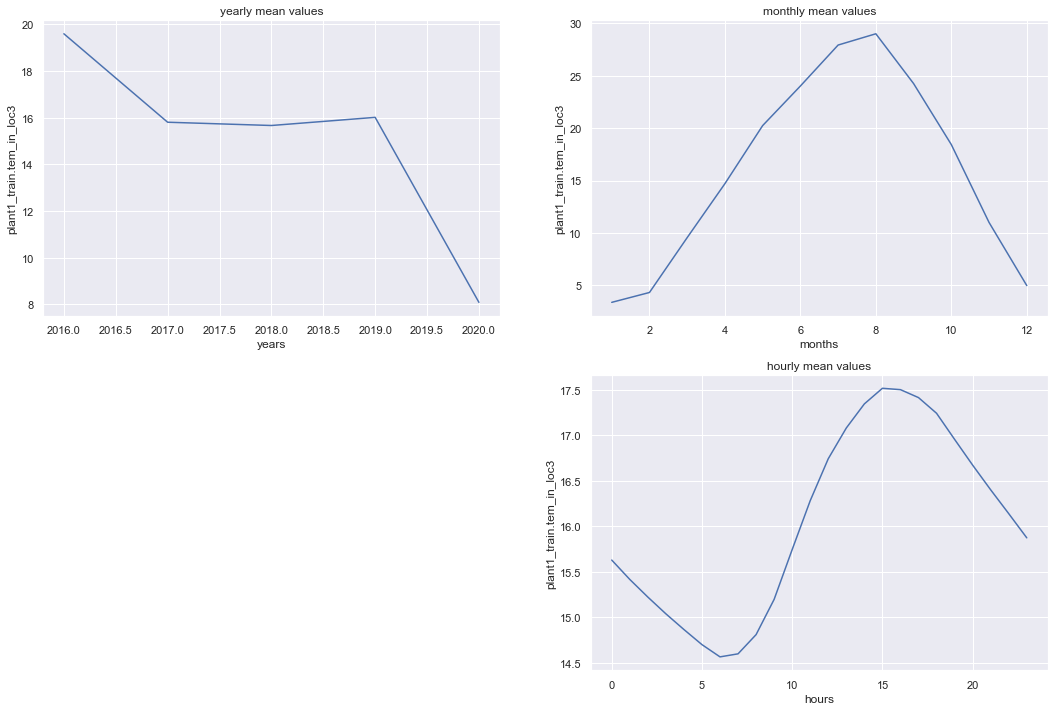

In [27]:
plotAggregateValues(newdata,'plant1_train.tem_in_loc3')

In [28]:
def plotBoxNdendity(data,col=None):
    if col in data.columns:    
        plt.figure(figsize=(18,8))

        ax1 = plt.subplot(121)
        data.boxplot(col,ax=ax1)
        ax1.set_ylabel('Boxplot temperature levels in Delhi', fontsize=10)

        ax2 = plt.subplot(122)
        data[col].plot(ax=ax2,legend=True,kind='density')
        ax2.set_ylabel('Temperature distribution in Delhi', fontsize=10)

    else:
        print("Column not in the data")

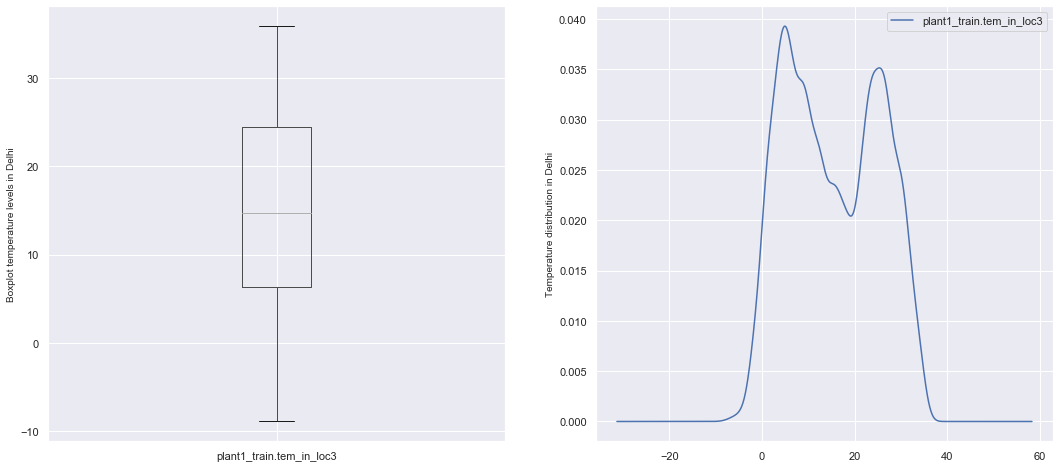

In [29]:
plotBoxNdendity(data,'plant1_train.tem_in_loc3')

# Train & Test Split

In [30]:
train = newdata['2016-01':'2020-03']
test = newdata['2019-04':'2020-04']

In [31]:
print(test)

                       plant1_train.tem_in_loc3
plant1_train.mea_ddhr                          
2019-04-01 00:00:00                    9.905410
2019-04-01 01:00:00                    9.950820
2019-04-01 02:00:00                    9.996230
2019-04-01 03:00:00                   10.041639
2019-04-01 04:00:00                   10.087049
...                                         ...
2020-04-02 20:00:00                   25.868000
2020-04-02 21:00:00                   26.002000
2020-04-02 22:00:00                   26.136000
2020-04-02 23:00:00                   26.270000
2020-04-03 00:00:00                   26.404000

[8833 rows x 1 columns]


# 1. Identification

In [32]:
# Let's decompose the time series to visualize trend, season and noise seperately
def decomposeNplot(data):
    decomposition = sm.tsa.seasonal_decompose(data)

    plt.figure(figsize=(15,16))

    ax1 = plt.subplot(411)
    decomposition.observed.plot(ax=ax1)
    ax1.set_ylabel('Observed')

    ax2 = plt.subplot(412)
    decomposition.trend.plot(ax=ax2)
    ax2.set_ylabel('Trend')

    ax3 = plt.subplot(413)
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Seasonal')

    ax4 = plt.subplot(414)
    decomposition.resid.plot(ax=ax4)
    ax4.set_ylabel('Residuals')

    return decomposition

# Resampling

In [33]:
# Resampling the data to mothly and averaging out the temperature & we will predict the monthly average temperature
ftraindata = train['plant1_train.tem_in_loc3'].resample('D').mean()
ftestdata = test['plant1_train.tem_in_loc3'].resample('D').mean()

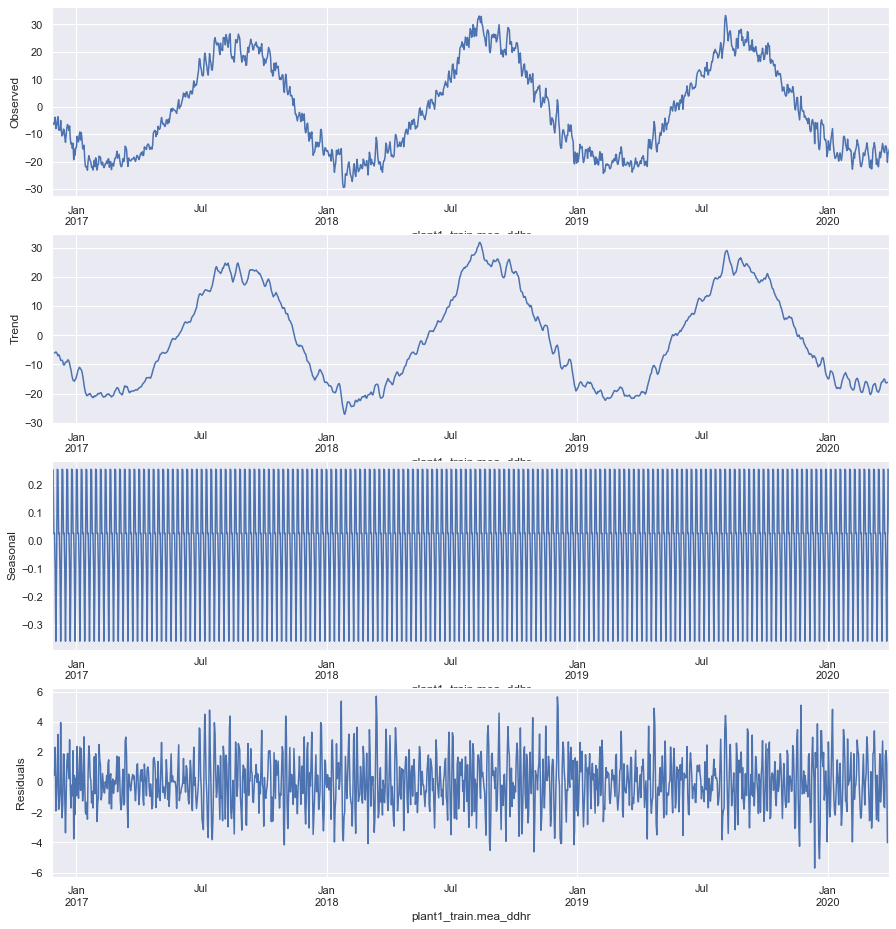

In [34]:
# Taking the seasonal difference S=12 and decomposing the timeseries
decomposition = decomposeNplot(ftraindata.diff(240).dropna())

In [35]:
# Let's check for stationarity (Augmented Dickey Fuller test)
results = adfuller(ftraindata.diff(240).dropna())
results

(-2.324718581844952,
 0.16411961497801564,
 23,
 1197,
 {'1%': -3.4358248361156765,
  '5%': -2.8639575982634757,
  '10%': -2.5680571735171958},
 5091.17098724829)

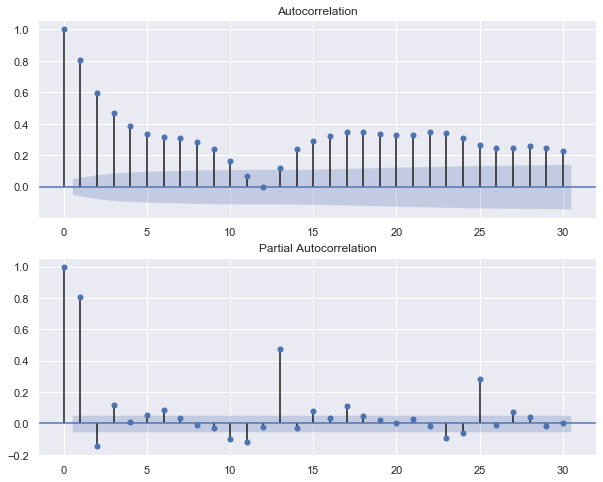

In [36]:
# To get non-seasonal oreders of the SARIMAX Model we will first use ACF & PACF plots
plt.figure(figsize=(10,8))

ax1 = plt.subplot(211)
acf = plot_acf(ftraindata.diff(12).dropna(),lags=30,ax=ax1)

ax2 = plt.subplot(212)
pacf = plot_pacf(ftraindata.diff(12).dropna(),lags=30,ax=ax2)

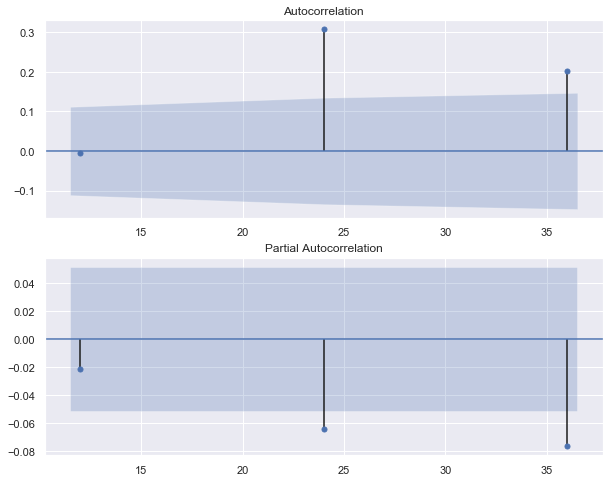

In [37]:

lags = [12*i for i in range(1,4)]

plt.figure(figsize=(10,8))

ax1 = plt.subplot(211)
acf = plot_acf(ftraindata.diff(12).dropna(),lags=lags,ax=ax1)

ax2 = plt.subplot(212)
pacf = plot_pacf(ftraindata.diff(12).dropna(),lags=lags,ax=ax2)



# 지연 1 및 PACF가 종료 된 후 ACF가 차단됨에 따라 계절 MA의 순서는 1 (Q = 1)이라고 말할 수 있습니다.

In [38]:
model = SARIMAX(ftraindata,order=(1,0,1),seasonal_order=(7,2,3,31),trend='t')
results = model.fit()
results.summary()

C:\Users\student\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                   plant1_train.tem_in_loc3   No. Observations:                 1461
Model:             SARIMAX(1, 0, 1)x(7, 2, [1, 2, 3], 31)   Log Likelihood               -3324.067
Date:                                    Thu, 25 Jun 2020   AIC                           6676.134
Time:                                            20:42:58   BIC                           6749.543
Sample:                                        04-01-2016   HQIC                          6703.577
                                             - 03-31-2020                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -1.549e-06    3.5e-05     -0.044      0.965   -7.02e-05    6.71e-05
ar.L1          0.7438      0.058     12.764      0.000       0.630       0.858
ma.L1          0.1701      0.085      2.002      0.045       0.004       0.337
ar.S.L31      -0.5164      0.368     -1.403      0.161      -1.238       0.205
ar.S.L62      -0.0141      0.231     -0.061      0.951      -0.467       0.439
ar.S.L93       0.0448      0.104      0.432      0.666      -0.159       0.248
ar.S.L124     -0.1423      0.101     -1.403      0.161      -0.341       0.056
ar.S.L155     -0.3397      0.106     -3.197      0.001      -0.548      -0.131
ar.S.L186     -0.4955      0.119     -4.153      0.000      -0.729      -0.262
ar.S.L217     -0.3363      0.113     -2.977      0.003      -0.558      -0.115
ma.S.L31      -0.6427      0.372     -1.727      0.084      -1.372       0.087
ma.S.L62      -0.2458      0.534     -0.461      0.645      -1.292       0.800
ma.S.L93       0.0054      0.306      0.018      0.986      -0.595       0.606
sigma2        11.6578      0.880     13.241      0.000       9.932      13.383
===================================================================================
Ljung-Box (Q):                      335.62   Jarque-Bera (JB):                33.35
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
# # Lets select the best model based on the aic & bic scores using auto_arima
#results = pm.auto_arima(ftraindata,
#                       seasonal=True, m=12,
#                       d=0,D=1,trace=True,
#                       error_action='ignore',
#                       suppress_warnings=True)

In [40]:
# Check the value of Prob(Q) if it is > 0.05 => The residuals are uncorrelated
# Similarly if Prob(JB) > 0.05 => The residuals are normally distributed
#results.summary()

In [41]:
# Mean Absolute Error for training data
print(np.mean(np.abs(results.resid)))

1.952909063315136


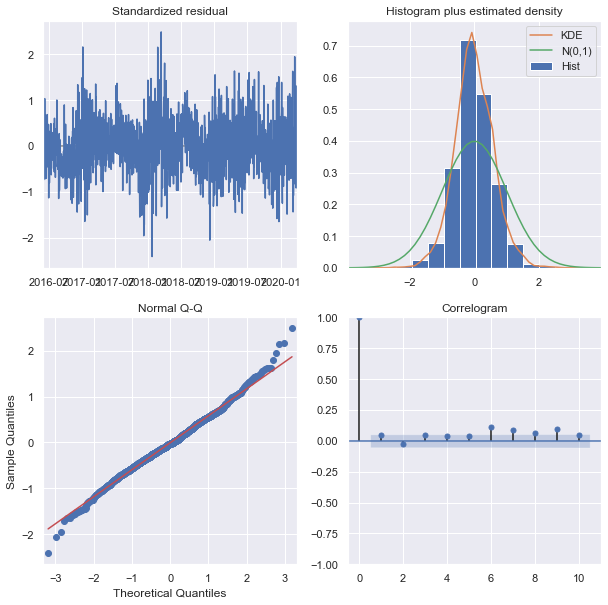

In [42]:
diagnostics = results.plot_diagnostics(figsize=(10,10))

# Forecasting

In [43]:
forecast = results.get_forecast(steps=len(ftestdata))

In [44]:
predictedmean = forecast.predicted_mean
bounds = forecast.conf_int()
lower_limit = bounds.iloc[:,0]
upper_limit = bounds.iloc[:,1]

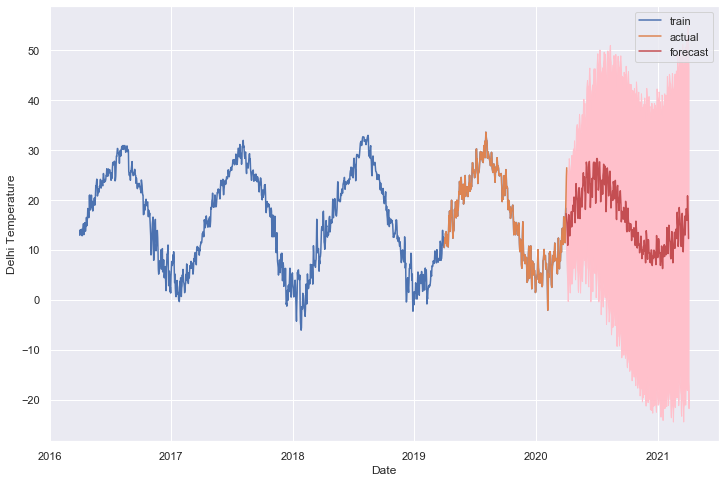

In [45]:
plt.figure(figsize=(12,8))

plt.plot(ftraindata.index, ftraindata, label='train')
plt.plot(ftestdata.index,ftestdata,label='actual')

plt.plot(predictedmean.index, predictedmean, color='r', label='forecast')

plt.fill_between(lower_limit.index,lower_limit,upper_limit, color='pink')

plt.xlabel('Date')
plt.ylabel('Delhi Temperature')
plt.legend()
plt.show()

base_dir = 'C:/Users/student/Downloads/'

filename = 'SARIMA_0_0_1_0_1_1_12.pkl'

joblib.dump(results,filename = base_dir  + filename)

In [46]:
output=pd.DataFrame({'Time Series':ftestdata.index, 'First_Predict':predictedmean})

In [47]:
output.to_csv("C:/Users/Student/Downloads/0626plant1_temp3.csv", index=False)